# Do people perform worse with a time limit? 
## We study this we study this question in great detail.
We will first run a hypothesis t-test for difference in mean score (proportion correct), 
and then we will run a t-slope test for time taken, and proportion correct

First, we will import our dataset

In [1]:
data <- read.csv("data.csv", quote="")
dim(data)

[1] 86  6

Then, lets split into our two treatments:

In [2]:
timed <- subset(data, treatment == "timed")
untimed <- subset(data, treatment == "untimed")

In [3]:
summary(timed["proportion"])

   proportion     
 Min.   :0.06667  
 1st Qu.:0.91811  
 Median :0.96649  
 Mean   :0.91081  
 3rd Qu.:0.98653  
 Max.   :1.00000  

In [4]:
summary(untimed["proportion"])

   proportion    
 Min.   :0.8667  
 1st Qu.:0.9590  
 Median :0.9867  
 Mean   :0.9728  
 3rd Qu.:1.0000  
 Max.   :1.0000  

### Difference in mean score

In [28]:
result <- t.test(untimed["proportion"], timed["proportion"], alternative= "g")

# Print the results
print(result)


	Welch Two Sample t-test

data:  untimed["proportion"] and timed["proportion"]
t = 2.4065, df = 57.859, p-value = 0.00966
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.01891647        Inf
sample estimates:
mean of x mean of y 
0.9727537 0.9108078 



### T-slope test
For those who took th test untimed, is there a relationship with the time they took, and the proportion they got correct?

R has no t-slope test built in, but we can get the values doing basic linear regression

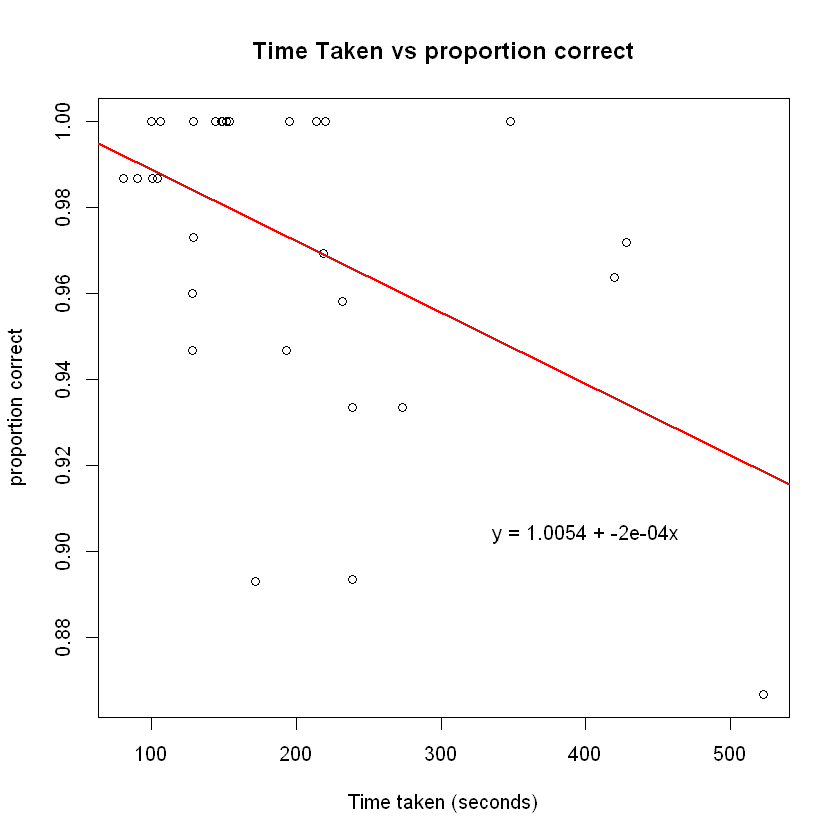

In [23]:
model <- lm(proportion~et, data = untimed)
plot(untimed$et, untimed$proportion, main = "Time Taken vs proportion correct", xlab = "Time taken (seconds)", ylab = "proportion correct")
abline(model, col = "red", lwd = 2)
eq <- paste0("y = ", round(coef(model)[1], 4), " + ", round(coef(model)[2], 4), "x")
text(400, .9, eq, pos = 3, offset = 0.5)

In [17]:
summary(model)


Call:
lm(formula = proportion ~ et, data = untimed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08385 -0.01759  0.01118  0.01999  0.05240 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.005e+00  1.246e-02   80.69  < 2e-16 ***
et          -1.662e-04  5.596e-05   -2.97  0.00592 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03253 on 29 degrees of freedom
Multiple R-squared:  0.2333,	Adjusted R-squared:  0.2068 
F-statistic: 8.824 on 1 and 29 DF,  p-value: 0.005919


Our t-stat slope statistic can be found here:

In [13]:
coef(summary(model))["et", "t value"]

[1] -2.970442